In [1]:
import numpy as np
import matplotlib.pyplot as plt
import lmfit
import scipy.optimize as opt

In [2]:
dati=np.genfromtxt('en.dat')

In [3]:
r=dati[:,0]
en=dati[:,2]+1

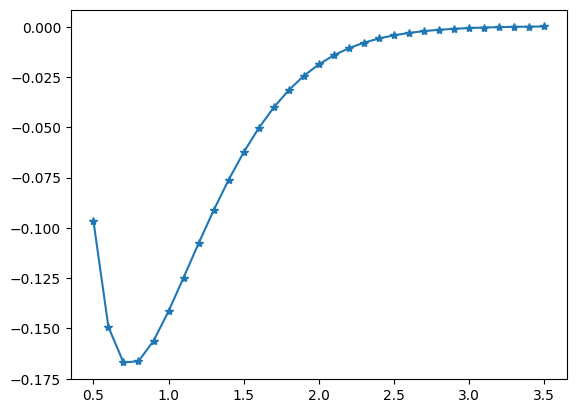

In [4]:
plt.plot(r,en,'-*')

In [5]:
def V_arm(r, c, k, r0):
    return c+k/2*(r-r0)**2

In [6]:
def V_LJ(r, D, r0):
    return D*((r0/r)**12-2*(r0/r)**6)

In [7]:
def V_morse(r, D, a, r0):
    er=np.exp(-a*(r-r0))
    return D*(er*er-2*er)

## prima strategia
usare opt.curve_fit

In [8]:
p_arm0 = [-0.15, 0.5, 0.5]  # for [amp, cen, wid]
p_arm, covar = opt.curve_fit(V_arm, r[1:6], en[1:6], p0=p_arm0)
p_arm

array([-0.1669821 ,  1.06119073,  0.7750688 ])

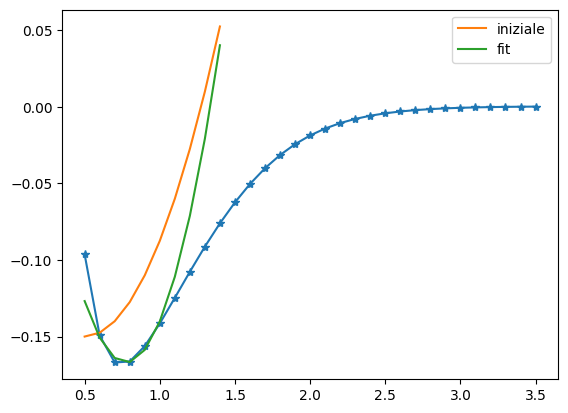

In [9]:
plt.plot(r,en,'-*')
c,k,r0=p_arm
plt.plot(r[:10],V_arm(r[:10], *p_arm0), label="iniziale")
plt.plot(r[:10],V_arm(r[:10], *p_arm), label="fit")
plt.legend()

In [13]:
p_LJ0 = [0.15,0.9]  # for [amp, cen, wid]
p_LJ, covar = opt.curve_fit(V_LJ, r, en, p0=p_LJ0)
p_LJ


array([0.27833208, 0.55282941])

In [14]:
p_morse0= [0.15, 1, 0.6]
p_morse, covar = opt.curve_fit(V_morse, r, en, p0=p_morse0)
p_morse

array([0.17141673, 2.14436397, 0.73954143])

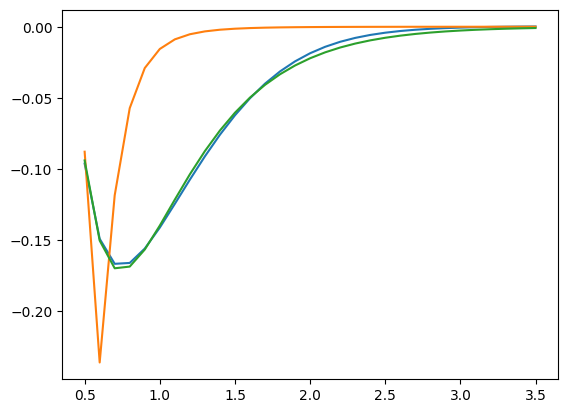

In [15]:
plt.plot(r, en)
plt.plot(r, V_LJ(r, *p_LJ))
plt.plot(r, V_morse(r, *p_morse))

## seconda strategia
usare i modelli di lmfit

In [13]:
morse=lmfit.Model(V_morse)

In [14]:
P_morse=morse.make_params(D=0.15, a=1, r0=0.6)
P_morse

Parameters([('D', <Parameter 'D', value=0.15, bounds=[-inf:inf]>), ('a', <Parameter 'a', value=1, bounds=[-inf:inf]>), ('r0', <Parameter 'r0', value=0.6, bounds=[-inf:inf]>)])

In [15]:
fit=morse.fit(en, P_morse, r=r)
print(fit.fit_report())

[[Model]]
    Model(V_morse)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 43
    # data points      = 31
    # variables        = 3
    chi-square         = 2.2150e-04
    reduced chi-square = 7.9107e-06
    Akaike info crit   = -361.321521
    Bayesian info crit = -357.019559
    R-squared          = 0.99789490
[[Variables]]
    D:   0.17141673 +/- 0.00145898 (0.85%) (init = 0.15)
    a:   2.14436397 +/- 0.02365427 (1.10%) (init = 1)
    r0:  0.73954143 +/- 0.00291324 (0.39%) (init = 0.6)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, a)  = 0.635
    C(a, r0) = -0.286
    C(D, r0) = -0.192


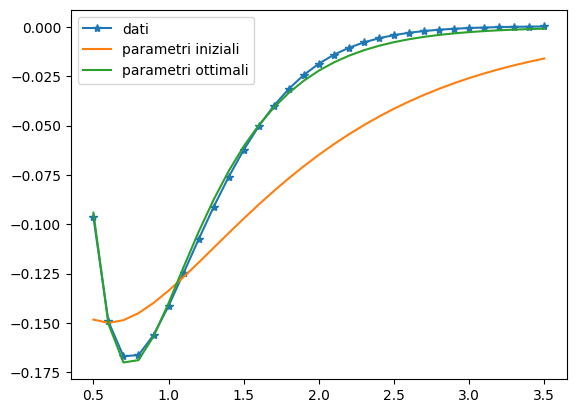

In [16]:
plt.plot(r,en, '-*', label='dati')
plt.plot(r, fit.init_fit, label='parametri iniziali')
plt.plot(r, fit.best_fit, label='parametri ottimali')
plt.legend()
None

## esercizio
il potenziale LJ è un caso particolare del potenziale di Mie:
$$ V_\mbox{mie}=D\left(\left(\frac{r_0}{r}\right)^{2n}-2\left(\frac{r_0}{r}\right)^n\right)$$
con $n=6$, provare diversi valori di $n$ e identificare il più adatto a rappresentare i dati.

## altre possibilità
Qui sotto proviamo un LJ modificato con un parametro di shift.

In [31]:
def V_LJS(r, D, r0, s):
    rc=r+s
    return D*((r0/rc)**12-2*(r0/rc)**6)

In [32]:
LJS=lmfit.Model(V_LJS)
P_LJS=LJS.make_params(D=0.15, r0=0.6, s=0)
P_LJS

Parameters([('D', <Parameter 'D', value=0.15, bounds=[-inf:inf]>), ('r0', <Parameter 'r0', value=0.6, bounds=[-inf:inf]>), ('s', <Parameter 's', value=0, bounds=[-inf:inf]>)])

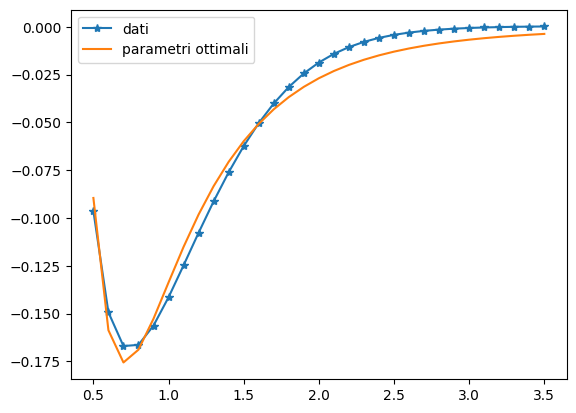

In [33]:
fit_LJS=LJS.fit(en, P_LJS, r=r)
plt.plot(r,en, '-*', label='dati')
plt.plot(r, fit_LJS.best_fit, label='parametri ottimali')
plt.legend();

In [34]:
fit_LJS.best_values

{'D': 0.17559990911363088, 'r0': 2.4638231051168313, 's': 1.7552328425265786}